In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [46]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:
df = pd.read_csv('./occ_ech_1444.csv')
df['date'] = pd.to_numeric(df['date'])

In [4]:
ls_auth = df['authority'].unique()

In [5]:
df_out = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', 'am', 'am_av_1444', 'am_ap_1444', 'cons', 'cons_av_1444',
                                     'cons_ap_1444', 'total'])
for element in ls_auth :
    subdf = df.loc[df['authority'] == element]
    dic = {}
    
    dic['id'] = element
    dic['am_av_1444'] = 0
    dic['am_ap_1444'] = 0
    dic['cons_av_1444'] = 0
    dic['cons_ap_1444'] = 0
    
    for index, row in subdf.iterrows() :
        
        if row['role'] == 'group_50' :
            #df_out['corporation'] = row['represents_in']
            dic['corporation'] = row['represents_in']
            
            if pd.isna(row['represents']) == False :
                #df_out['poele|metier'] = row['represents']
                dic['poele|metier'] = row['represents']
                
                

            
    av1444 = subdf.loc[subdf['date'] <= 1444]
    
    if 'group_48' in av1444['role'].values:
        dic['am_av_1444'] = av1444['role'].value_counts()['group_48']
    
    if 'group_49' in av1444['role'].values:
        dic['cons_av_1444'] = av1444['role'].value_counts()['group_49']

    
    ap1444 = subdf.loc[subdf['date'] > 1444]
    
    if 'group_48' in ap1444['role'].values:
        dic['am_ap_1444'] = ap1444['role'].value_counts()['group_48']
    
    if 'group_49' in ap1444['role'].values:
        dic['cons_ap_1444'] = ap1444['role'].value_counts()['group_49']
    
    dic['am'] = dic['am_av_1444'] + dic['am_ap_1444']
    dic['cons'] = dic['cons_av_1444'] + dic['cons_ap_1444']
    dic['total'] = dic['am'] + dic['cons']
    df_out = df_out.append(dic, ignore_index=True)

In [6]:
df_out['cons'] = df_out['cons'].astype(int)
df_out['am'] = df_out['am'].astype(int)

In [7]:
df_out

,id,corporation,poele|metier,am,am_av_1444,am_ap_1444,cons,cons_av_1444,cons_ap_1444,total
0,aves_aa_4R_auth_1093,group_30,NaN,0,0,0,0,0,0,0
1,aves_aa_4R_auth_1092,group_12,NaN,0,0,0,0,0,0,0
2,aves_aa_4R_auth_1091,group_12,NaN,0,0,0,0,0,0,0
3,aves_aa_4R_auth_1090,group_12,NaN,0,0,0,0,0,0,0
4,aves_aa_4R_auth_1089,group_12,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
373,aves_aa_4R_auth_0134,group_05,group_44,0,0,0,3,3,0,3
374,aves_aa_4R_auth_0130,group_23,group_45,0,0,0,7,7,0,7
375,aves_aa_4R_auth_0112,group_19,NaN,0,0,0,8,8,0,8
376,aves_aa_4R_auth_0081,group_06,NaN,3,3,0,15,13,2,18


In [8]:
df_out = df_out.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['corporation des marchands', 'corporation des boulangers', 'corporation des bouchers', 
                'corporation des tonneliers', 'corporation des drapiers', 'corporation des tanneurs', 
                'corporation des cabaretiers', 'corporation des maçons', 'corporation des forgerons', 
                'corporation des tailleurs', 'corporation des bateliers', 'corporation des pelletiers', 
                'corporation des charpentiers', 'corporation des crieurs et mesureurs de vin', 
                'corporation des cordonniers', 'corporation des orfevres', 'corporation des marchands de grains', 
                'corporation des jardiniers', 'corporation des pêcheurs', 'corporation des barbiers et baigneurs', 
                'corporation des sauniers', 'corporation des tisserands', 'corporation des gourmets et courtiers', 
                'corporation des charrons', 'corporation des regrattiers cordiers et fruitiers', 
                'corporation des coltineurs de tonneaux', 'corporation des constructeurs de bateaux', 
                'corporation des huiliers meuniers et tondeurs de draps'])

In [9]:
df_out

,id,corporation,poele|metier,am,am_av_1444,am_ap_1444,cons,cons_av_1444,cons_ap_1444,total
0,aves_aa_4R_auth_1093,corporation des coltineurs de tonneaux,NaN,0,0,0,0,0,0,0
1,aves_aa_4R_auth_1092,corporation des maçons,NaN,0,0,0,0,0,0,0
2,aves_aa_4R_auth_1091,corporation des maçons,NaN,0,0,0,0,0,0,0
3,aves_aa_4R_auth_1090,corporation des maçons,NaN,0,0,0,0,0,0,0
4,aves_aa_4R_auth_1089,corporation des maçons,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
373,aves_aa_4R_auth_0134,corporation des marchands,group_44,0,0,0,3,3,0,3
374,aves_aa_4R_auth_0130,corporation des pêcheurs,group_45,0,0,0,7,7,0,7
375,aves_aa_4R_auth_0112,corporation des cordonniers,NaN,0,0,0,8,8,0,8
376,aves_aa_4R_auth_0081,corporation des boulangers,NaN,3,3,0,15,13,2,18


In [10]:
df_out2 = pd.DataFrame(columns = ['id', 'corporation', 'poele|metier', "mandat d'ammeistre", 'mandat de conseiller', 'époque', 'total'])

for index, row in df_out.iterrows():
    dic = {}
    dic2 = {}
    dic['id'] = row['id']
    dic2['id'] = row['id']
    dic['corporation'] = row['corporation']
    dic2['corporation'] = row['corporation']
    dic['poele|metier'] = row['poele|metier']
    dic2['poele|metier'] = row['poele|metier']
    
    dic["mandat d'ammeistre"] = row['am_av_1444']
    dic['époque'] = "avant 1444"
    dic2["mandat d'ammeistre"] = row['am_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['mandat de conseiller'] = row['cons_av_1444']
    dic['époque'] = "avant 1444 (1444 inclus)"
    dic2['mandat de conseiller'] = row['cons_ap_1444']
    dic2['époque'] = "après 1444"
    
    dic['total'] = dic["mandat d'ammeistre"] + dic['mandat de conseiller']
    dic2['total'] = dic2["mandat d'ammeistre"] + dic2['mandat de conseiller']
    
    df_out2 = df_out2.append(dic, ignore_index=True)
    df_out2 = df_out2.append(dic2, ignore_index=True)

In [11]:
df_out2['mandat de conseiller'] = df_out2['mandat de conseiller'].astype(int)
df_out2["mandat d'ammeistre"] = df_out2["mandat d'ammeistre"].astype(int)
df_out2

,id,corporation,poele|metier,mandat d'ammeistre,mandat de conseiller,époque,total
0,aves_aa_4R_auth_1093,corporation des coltineurs de tonneaux,NaN,0,0,avant 1444 (1444 inclus),0
1,aves_aa_4R_auth_1093,corporation des coltineurs de tonneaux,NaN,0,0,après 1444,0
2,aves_aa_4R_auth_1092,corporation des maçons,NaN,0,0,avant 1444 (1444 inclus),0
3,aves_aa_4R_auth_1092,corporation des maçons,NaN,0,0,après 1444,0
4,aves_aa_4R_auth_1091,corporation des maçons,NaN,0,0,avant 1444 (1444 inclus),0
...,...,...,...,...,...,...,...
751,aves_aa_4R_auth_0112,corporation des cordonniers,NaN,0,0,après 1444,0
752,aves_aa_4R_auth_0081,corporation des boulangers,NaN,3,13,avant 1444 (1444 inclus),16
753,aves_aa_4R_auth_0081,corporation des boulangers,NaN,0,2,après 1444,2
754,aves_aa_4R_auth_0075,corporation des gourmets et courtiers,NaN,0,5,avant 1444 (1444 inclus),5


In [25]:
ls_ylabels = my_order.to_list()

In [26]:
ls_ylabels[6] = 'corporation des marchands\nde grains'

In [27]:
ls_ylabels

['corporation des boulangers',
 'corporation des bateliers',
 'corporation des marchands',
 'corporation des bouchers',
 'corporation des tisserands',
 'corporation des sauniers',
 'corporation des marchands\nde grains',
 'corporation des tonneliers',
 'corporation des tanneurs',
 'corporation des charrons',
 'corporation des forgerons',
 'corporation des tailleurs',
 'corporation des charpentiers',
 'corporation des regrattiers cordiers et fruitiers',
 'corporation des jardiniers',
 'corporation des barbiers et baigneurs',
 'corporation des gourmets et courtiers',
 'corporation des pelletiers',
 'corporation des drapiers',
 'corporation des huiliers meuniers et tondeurs de draps',
 'corporation des cordonniers',
 'corporation des coltineurs de tonneaux',
 'corporation des maçons',
 'corporation des pêcheurs',
 'corporation des constructeurs de bateaux',
 'corporation des cabaretiers',
 'corporation des orfevres',
 'corporation des crieurs et mesureurs de vin']

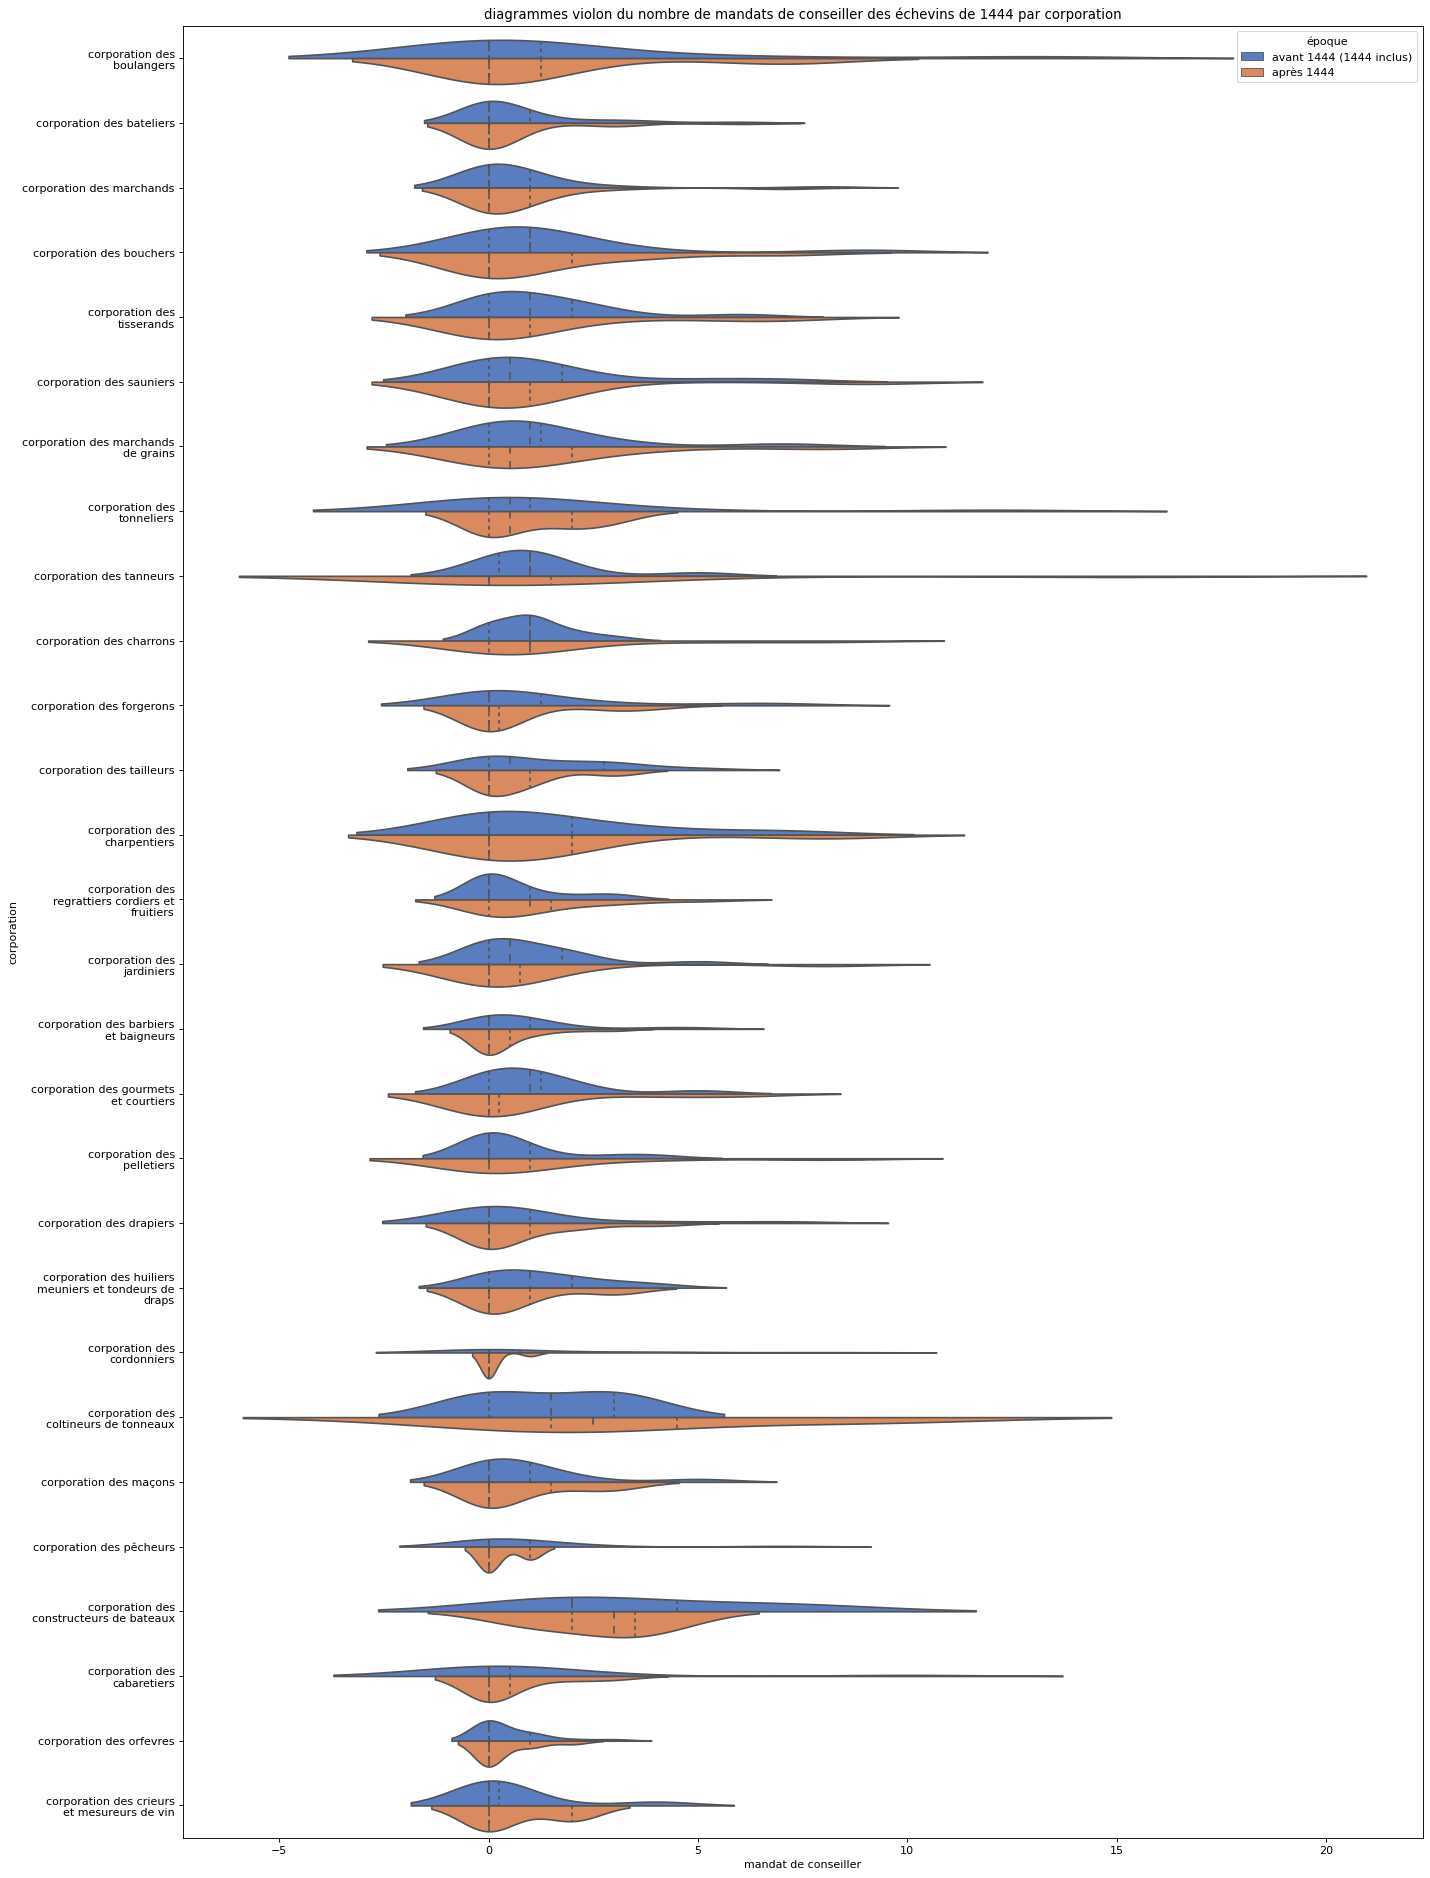

In [52]:
plt.figure(figsize=(20, 30), dpi=80)
my_order = df_out2.groupby(by=["corporation"])["mandat de conseiller"].sum().sort_values(ascending=False).index
violinplot_cons = sns.violinplot(y="corporation", x="mandat de conseiller", hue="époque", data=df_out2, 
                                 inner='quartile', order = my_order, palette="muted", split=True)
wrap_labels(violinplot_cons, 25)
violinplot_cons.set_title('diagrammes violon du nombre de mandats de conseiller des échevins de 1444 par corporation', loc='center')
fig = violinplot_cons.get_figure()
fig.savefig('violinplot_cons.svg', format='svg')

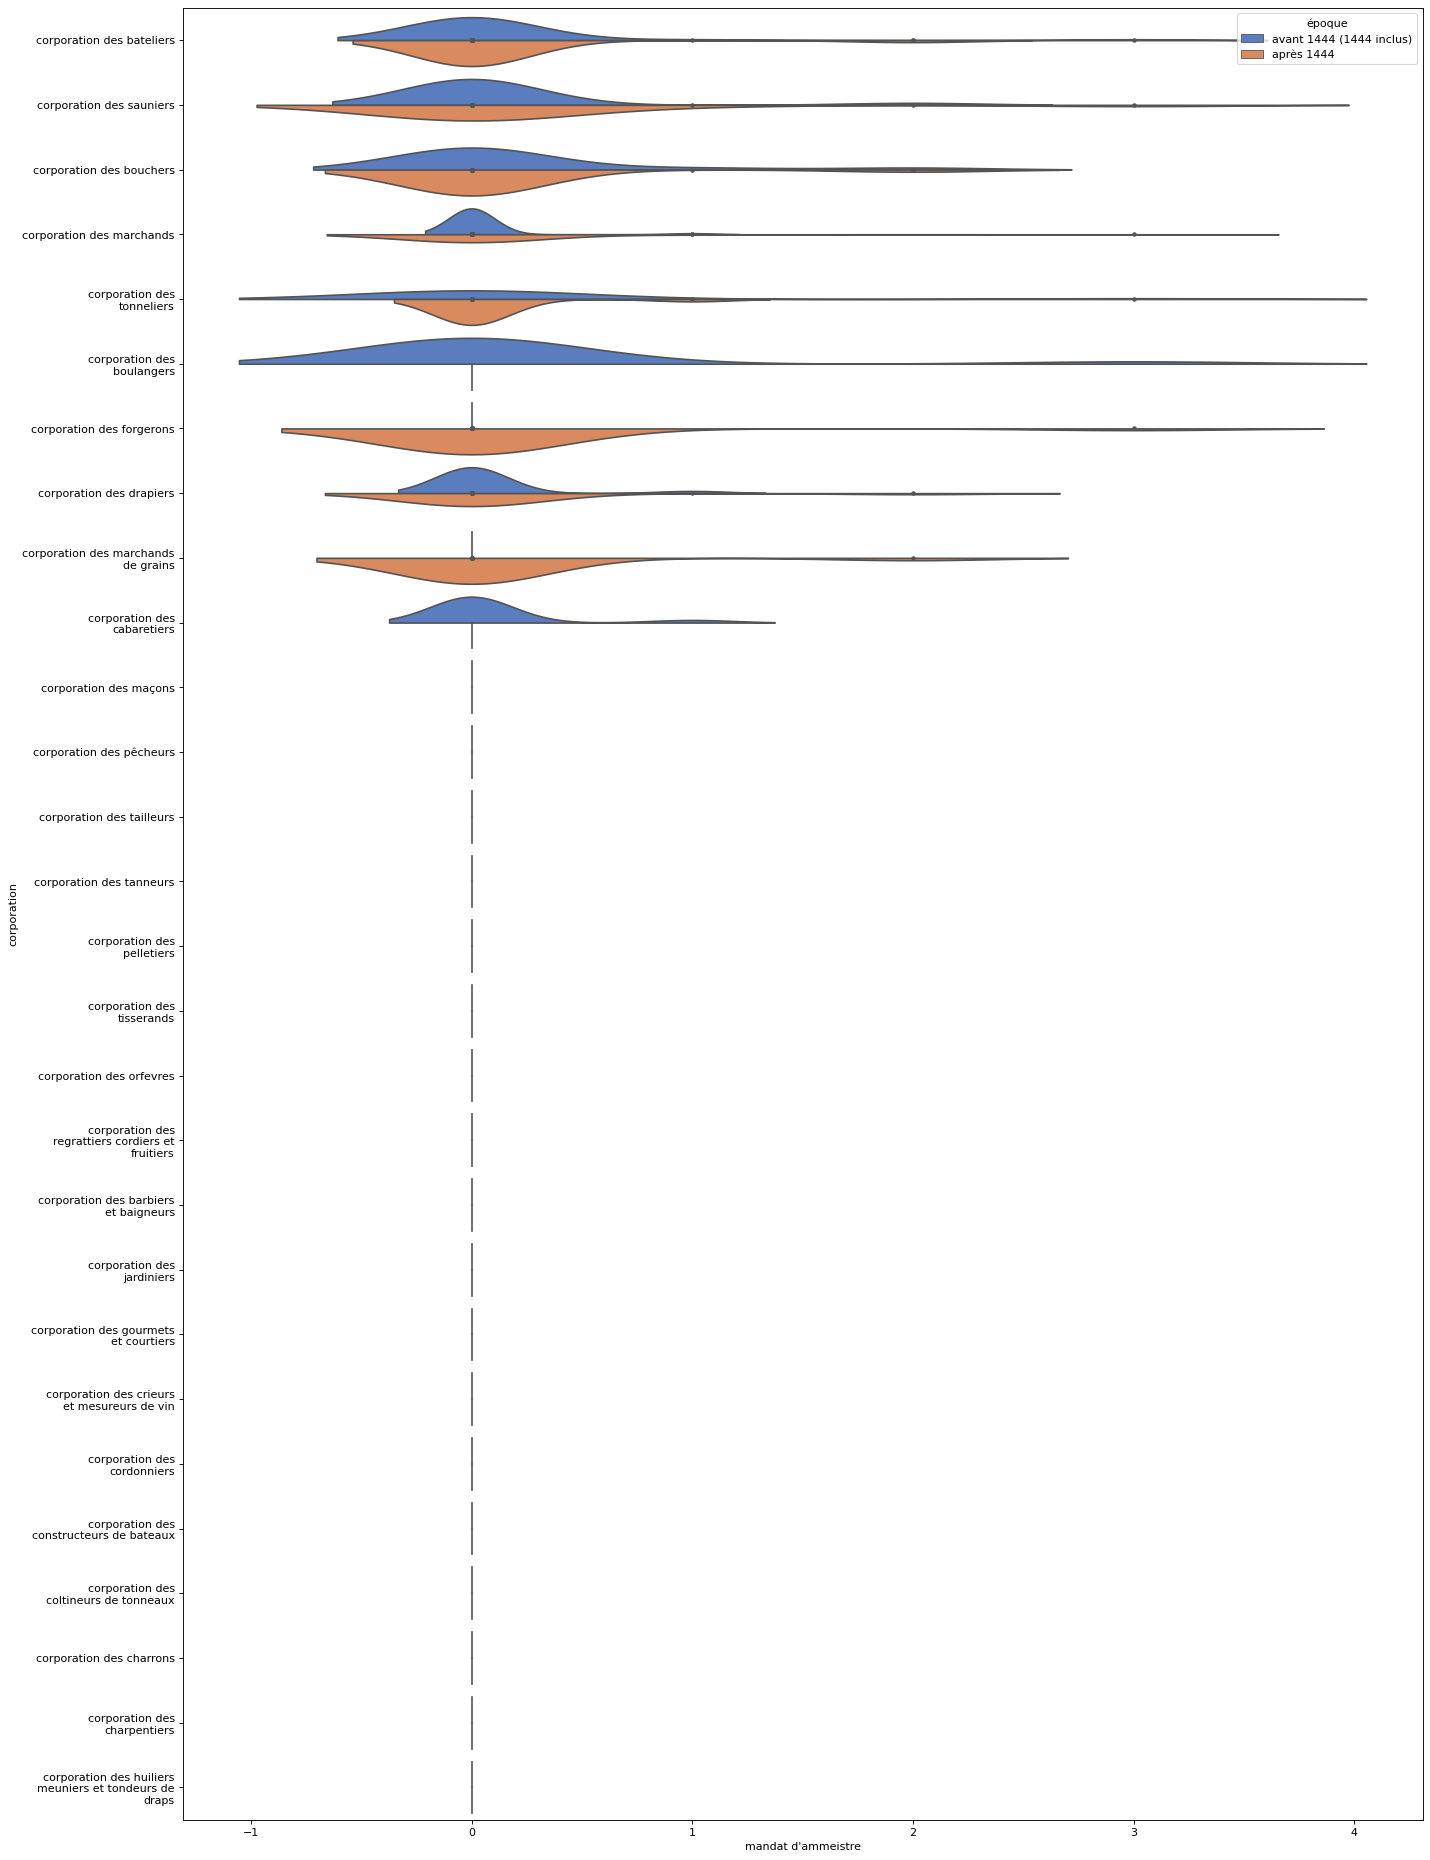

In [54]:
plt.figure(figsize=(20, 30), dpi=80)
my_order = df_out2.groupby(by=["corporation"])["mandat d'ammeistre"].sum().sort_values(ascending=False).index
violinplot_am = sns.violinplot(y="corporation", x="mandat d'ammeistre", hue="époque", data=df_out2, 
                                 inner='point', order = my_order, palette="muted", split=True)
wrap_labels(violinplot_am, 25)
violinplot_cons.set_title("diagrammes violon du nombre de mandats d'ammeistre des échevins de 1444 par corporation", loc='center')
fig = violinplot_am.get_figure()
fig.savefig('violinplot_am.svg', format='svg')

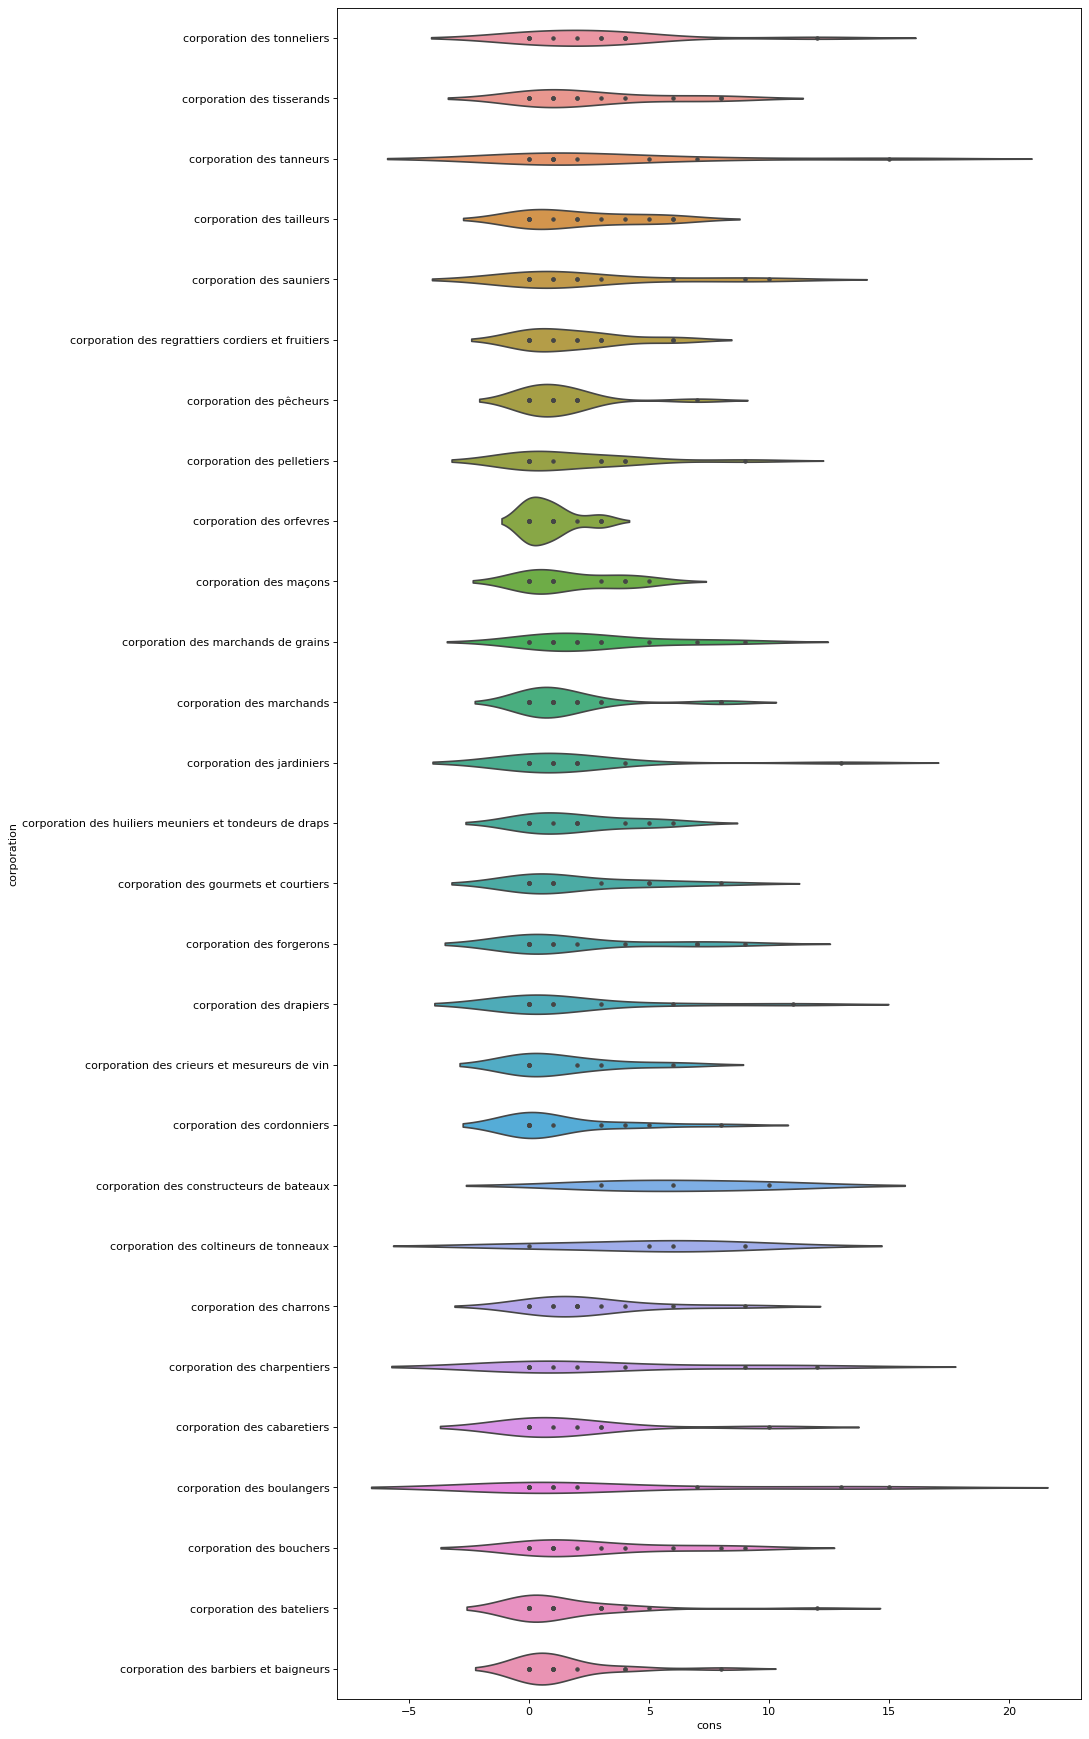

In [12]:
plt.figure(figsize=(12, 28), dpi=80)
my_order = df_out.groupby(by=["corporation"])["cons"].median().iloc[::-1].index
violinplot_cons = sns.violinplot(y="corporation", x="cons", data=df_out, inner='point', order = my_order)
plt.show()

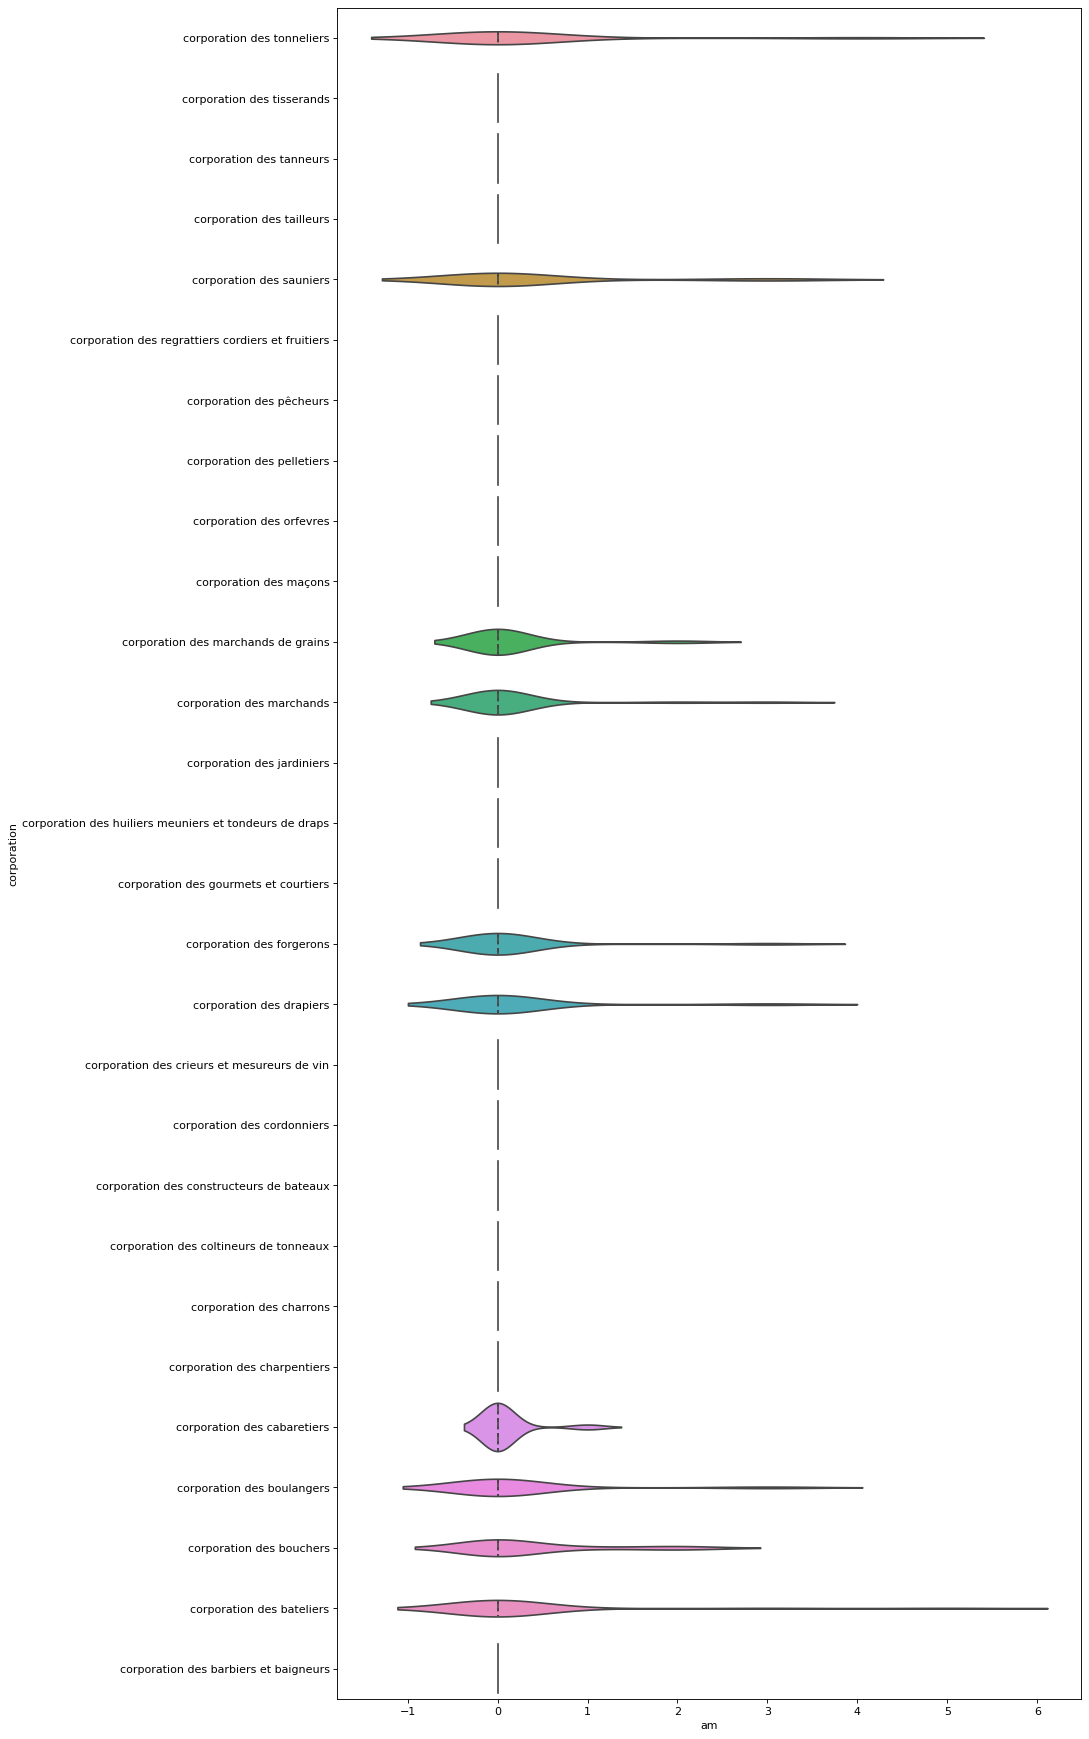

In [11]:
plt.figure(figsize=(12, 28), dpi=80)
my_order = df_out.groupby(by=["corporation"])["am"].median().iloc[::-1].index
violinplot_am = sns.violinplot(y="corporation", x="am", data=df_out, inner='quartile', order = my_order, scale_hue=False)